In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
import PIL
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
import matplotlib.pyplot as plt
import seaborn as sns


1. numpy as np: NumPy is fundamental for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently. In this code, it's likely used for array manipulation, especially in handling image data.
2. pandas as pd: Pandas is a powerful library for data manipulation and analysis. It provides data structures like DataFrame and Series, which are highly efficient for handling structured data. In this code, it might be used for organizing and preprocessing datasets.
3. os: The os module provides a portable way of using operating system-dependent functionality. It's commonly used for interacting with the file system, such as navigating directories, listing files, etc. In this code, it's likely used for file I/O operations.
4. tensorflow as tf: TensorFlow is an open-source deep learning library developed by Google. It provides a comprehensive ecosystem of tools, libraries, and community resources for building and deploying machine learning models. In this code, it's used for building and training deep learning models.
5. PIL: The Python Imaging Library (PIL) is a library for opening, manipulating, and saving many different image file formats. In this code, it's used for image preprocessing and visualization.
6. tensorflow.keras.preprocessing.image: This submodule of Keras provides utilities for preprocessing image data, such as data augmentation, loading images from directories, and converting images to arrays. In this code, it's used for preparing image datasets for training and validation.
7. tensorflow.keras.models: This submodule of Keras provides tools for building neural network models, including Sequential models and Functional API for building complex architectures. In this code, it's used for defining the architecture of the neural network model.
8. tensorflow.keras.layers: This submodule of Keras provides a variety of layer classes to build neural networks, such as convolutional layers, pooling layers, dense layers, etc. In this code, it's used for adding layers to the neural network model.
9. matplotlib.pyplot as plt: Matplotlib is a popular plotting library for creating static, interactive, and animated visualizations in Python. In this code, it's used for visualizing images and plotting training/validation loss curves.
10. seaborn as sns: Seaborn is a statistical data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. In this code, it's imported but not used explicitly.


# Dataset Validation : 

The dataset consists of images belonging to 100 different classes of butterflies and moths. These classes encompass a wide variety of species, including popular ones like the Monarch, Peacock, and Red Admiral, as well as more obscure ones such as the Atala, Arcigera Flower Moth, and Eastern Pine Elfin. Each class represents a distinct species of butterfly or moth, making the dataset diverse and comprehensive. 
The images are organized into three sets: a training set, a validation set, and a test set. The training set contains 12,594 images, the validation set contains 500 images, and the test set contains 500 images. Each image is resized to have dimensions of 224x224 pixels to standardize the input size for modeling purposes. 
Additionally, the datasets are shuffled for randomness during training and validation but remain unshuffled during testing to ensure consistent evaluation. The class names are extracted from the training dataset, resulting in a list of 100 unique class names, ranging from "ADONIS" to "ZEBRA LONG WING." This dataset serves as a valuable resource for training and evaluating machine learning models for butterfly and moth classification tasks.


In [2]:
train_dir = 'train'
test_dir = 'test'
val_dir = 'valid'

In [3]:
img_height,img_width=224,224
batch_size=32

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=123,
  shuffle=True,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  val_dir,
  shuffle=False,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 12594 files belonging to 100 classes.
Found 500 files belonging to 100 classes.


In [4]:
class_names = train_dataset.class_names
print(class_names)

['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88', 'APPOLLO', 'ARCIGERA FLOWER MOTH', 'ATALA', 'ATLAS MOTH', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK', 'BANDED TIGER MOTH', 'BECKERS WHITE', 'BIRD CHERRY ERMINE MOTH', 'BLACK HAIRSTREAK', 'BLUE MORPHO', 'BLUE SPOTTED CROW', 'BROOKES BIRDWING', 'BROWN ARGUS', 'BROWN SIPROETA', 'CABBAGE WHITE', 'CAIRNS BIRDWING', 'CHALK HILL BLUE', 'CHECQUERED SKIPPER', 'CHESTNUT', 'CINNABAR MOTH', 'CLEARWING MOTH', 'CLEOPATRA', 'CLODIUS PARNASSIAN', 'CLOUDED SULPHUR', 'COMET MOTH', 'COMMON BANDED AWL', 'COMMON WOOD-NYMPH', 'COPPER TAIL', 'CRECENT', 'CRIMSON PATCH', 'DANAID EGGFLY', 'EASTERN COMA', 'EASTERN DAPPLE WHITE', 'EASTERN PINE ELFIN', 'ELBOWED PIERROT', 'EMPEROR GUM MOTH', 'GARDEN TIGER MOTH', 'GIANT LEOPARD MOTH', 'GLITTERING SAPPHIRE', 'GOLD BANDED', 'GREAT EGGFLY', 'GREAT JAY', 'GREEN CELLED CATTLEHEART', 'GREEN HAIRSTREAK', 'GREY HAIRSTREAK', 'HERCULES MOTH', 'HUMMING BIRD HAWK MOTH', 'INDRA SWALLOW', 'IO MOTH', 'Iphiclus si

In [5]:
len(class_names)

100

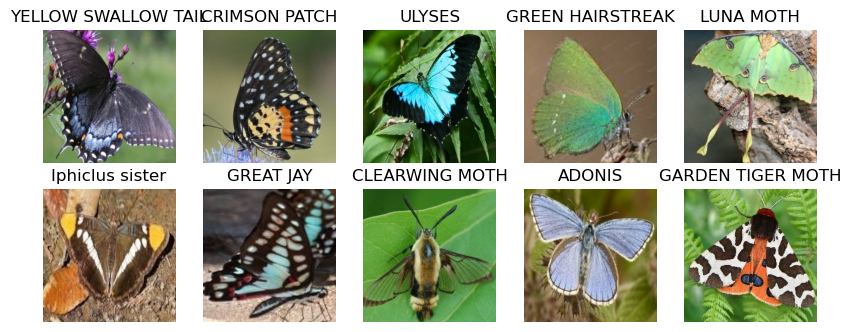

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(10):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Model Creation (ResNet50 )

In the model creation process, the ResNet50 architecture serves as the base model for transfer learning. The pre-trained layers of ResNet50 are utilized to extract meaningful features from the input images. These layers are frozen to retain their weights, ensuring that they are not updated during training. This strategy leverages the knowledge encoded in the pre-trained ResNet50 model while fine-tuning the additional layers for the specific classification task at hand.
After importing ResNet50 and configuring its parameters such as input shape and pooling, the base model summary reveals its architecture and the total number of parameters, including trainable and non-trainable parameters. The base model's layers are then iterated over, and each layer's trainable attribute is set to False to freeze them.
On top of the frozen base model, additional layers are added for further feature extraction and classification. These layers include a Flatten layer to convert the output of the base model to a one-dimensional tensor, followed by a Dense layer with 512 units and ReLU activation function. A Dropout layer is added with a dropout rate of 0.5 to prevent overfitting. Finally, a Dense layer with 100 units and softmax activation function is added to output the class probabilities for the 100 classes.
The model summary displays the architecture of the complete model, including the base ResNet50 model and the additional layers. Notably, the trainable parameters are set to 0 for the base ResNet50 model since its layers are frozen, while the non-trainable parameters reflect the parameters of the pre-trained ResNet50 model.
For compilation, the Adam optimizer is used with a learning rate of 0.0001. The loss function is set to sparse categorical crossentropy, suitable for multi-class classification tasks, and accuracy is chosen as the evaluation metric to monitor the model's performance during training.


## Using Resnet50 as base model:

In [8]:
from tensorflow.keras.applications import ResNet50

In [9]:
model = Sequential()

base_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=100,
                   weights='imagenet')


In [10]:
base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

## Freezing the pre-trained layers so that we do not have to update weights ourselves:

In [12]:
for layer in base_model.layers:
        layer.trainable=False

## Building model:

In [14]:
from tensorflow.keras.optimizers import Adam

11. tensorflow.keras.applications: This submodule of Keras provides pre-trained deep learning models for image classification, including ResNet50, VGG16, etc. In this code, it's used for loading the ResNet50 model as a base model for transfer learning.

In [15]:
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5)) # to prevent overfitting
model.add(Dense(100, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ ?                           │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [17]:
model.compile(optimizer=Adam(learning_rate=0.0001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

12. tensorflow.keras.optimizers: This submodule of Keras provides optimization algorithms for training neural networks, such as SGD, Adam, RMSprop, etc. In this code, it's used for specifying the optimizer during model compilation.

# Model Training and Evaluation:

The model training process involves fitting the model to the training dataset while validating its performance on the validation dataset. With the `model.fit()` method, the model undergoes training for a specified number of epochs, during which it learns to classify images based on the provided data. Each epoch represents a complete pass through the entire training dataset.
During training, the model's performance metrics, including accuracy and loss, are monitored and updated. This information is displayed for each epoch, allowing for the evaluation of the model's progress over time. Additionally, the validation accuracy and loss are also tracked to assess the model's generalization ability on unseen data.
After training, the model's performance is evaluated using the test dataset to assess its effectiveness in classifying new, unseen images. The `model.evaluate()` method calculates the test loss and accuracy, providing insights into how well the model performs on real-world data.
In the presented example, the model achieves a test accuracy of approximately 93.2% and a test loss of approximately 0.251. These metrics indicate that the model performs well in classifying images from the test dataset, with a high level of accuracy and relatively low loss.
Furthermore, a classification report is generated to provide detailed insights into the model's performance for each class. This report includes metrics such as precision, recall, and F1-score for each class, as well as overall metrics such as accuracy, macro average, and weighted average. These metrics offer a comprehensive understanding of the model's ability to correctly classify images across different classes.
Overall, the presented model demonstrates strong performance in image classification tasks, achieving high accuracy and effectively generalizing to unseen data.


## Training our model:


In [19]:

history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    
                   )


Epoch 1/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 520s 1s/step - accuracy: 0.1083 - loss: 4.2924 - val_accuracy: 0.6840 - val_loss: 1.6833
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 501s 1s/step - accuracy: 0.5471 - loss: 1.8744 - val_accuracy: 0.8140 - val_loss: 0.8929
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 501s 1s/step - accuracy: 0.7003 - loss: 1.1642 - val_accuracy: 0.8580 - val_loss: 0.6386
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 8956s 23s/step - accuracy: 0.7769 - loss: 0.8754 - val_accuracy: 0.8820 - val_loss: 0.5109
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 419s 1s/step - accuracy: 0.8135 - loss: 0.7144 - val_accuracy: 0.9040 - val_loss: 0.4284
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 390s 991ms/step - accuracy: 0.8478 - loss: 0.5824 - val_accuracy: 0.9120 - val_loss: 0.3742
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 397s 1s/step - accuracy: 0.8666 - loss: 0.5053 - val_accuracy: 0.9120 - val_loss: 0.3502
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 389s 986ms/step - accuracy: 0.8815 - loss: 0.4541 - 

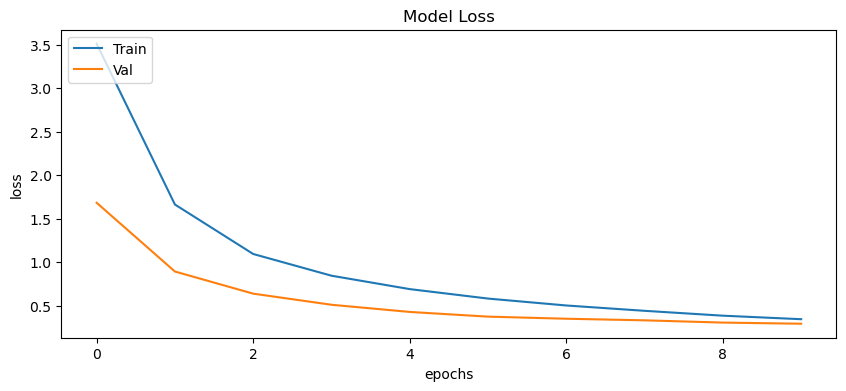

In [20]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()


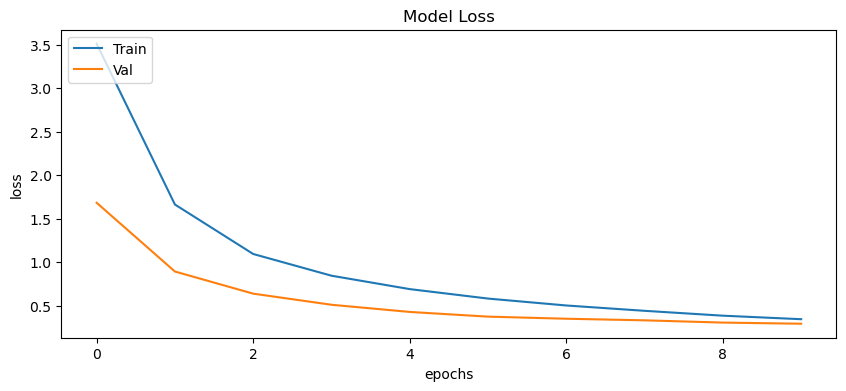

In [21]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()


In [22]:
## Test dataset prediction accuracy:

In [23]:

test_dataset = tf.keras.utils.image_dataset_from_directory( 
    test_dir, 
    seed = 123, 
    image_size=(img_height,img_width),
    shuffle=False 
)

Found 500 files belonging to 100 classes.


In [24]:
test_images, test_labels = tuple(zip(*test_dataset))

predictions = model.predict(test_dataset)
score = tf.nn.softmax(predictions)

16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step 


In [25]:
result = model.evaluate(test_dataset)
print("Test loss, test accuracy:", result)

16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 947ms/step - accuracy: 0.9166 - loss: 0.2975
Test loss, test accuracy: [0.2465747743844986, 0.9340000152587891]


## Classification report:


In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
y_test = np.concatenate(test_labels) 
y_pred = np.array([np.argmax(s) for s in score])

print(classification_report(y_test, y_pred, target_names=class_names))

                           precision    recall  f1-score   support

                   ADONIS       0.71      1.00      0.83         5
AFRICAN GIANT SWALLOWTAIL       1.00      1.00      1.00         5
           AMERICAN SNOOT       1.00      0.40      0.57         5
                    AN 88       1.00      0.80      0.89         5
                  APPOLLO       1.00      1.00      1.00         5
     ARCIGERA FLOWER MOTH       1.00      1.00      1.00         5
                    ATALA       1.00      1.00      1.00         5
               ATLAS MOTH       1.00      1.00      1.00         5
 BANDED ORANGE HELICONIAN       1.00      1.00      1.00         5
           BANDED PEACOCK       1.00      1.00      1.00         5
        BANDED TIGER MOTH       1.00      0.80      0.89         5
            BECKERS WHITE       1.00      0.80      0.89         5
  BIRD CHERRY ERMINE MOTH       1.00      1.00      1.00         5
         BLACK HAIRSTREAK       1.00      1.00      1.00     

# Image Classification:

In this image classification script, several functions are defined to facilitate the classification process. First, the preprocess_image function is created to preprocess an image from its raw data. This function resizes the image to the required dimensions and converts it into a format suitable for input to the model. Another function, load_image_from_url, is developed to retrieve image data from a given URL. This function utilizes the requests library to fetch the image content from the URL.
The user is prompted to input the URL of the image they want to classify. Once the URL is provided, the script attempts to load the image data using the load_image_from_url function. If successful, the input image is preprocessed using the preprocess_image function to prepare it for classification.
The preprocessed image is then fed into the trained model to make predictions about its class. The predicted class index and confidence score are determined from the model's output. Additionally, images of the predicted class from the validation dataset are retrieved to provide visual context for the classification results.
If images of the predicted class are found in the validation dataset, the input image along with up to five additional images of the predicted class are displayed using matplotlib. Below the plot, the predicted class and confidence score are printed to provide information about the classification outcome.


In [32]:
import requests
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from io import BytesIO

13. sklearn.metrics: This module from scikit-learn provides functions for evaluating machine learning models, including classification reports, confusion matrices, etc. In this code, it's used for evaluating the performance of the image classification model.
14. requests: The requests library is used for making HTTP requests in Python. In this code, it's likely used for fetching image data from URLs.
15. io: BytesIO: The io module provides Python's main facilities for dealing with various types of I/O. BytesIO allows you to treat bytes objects like file objects. In this code, it's used for handling image data fetched from URLs.


In [33]:
def preprocess_image(image):
    img = Image.open(BytesIO(image))
    img = img.resize((img_height, img_width))
    img_array = np.expand_dims(np.array(img), axis=0)
    return img_array

def load_image_from_url(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.content
    else:
        print("Failed to load image from URL:", url)
        return None

Enter the URL of the image you want to classify: https://ucanr.edu/blogs/Alfalfa/blogfiles/59962_original.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


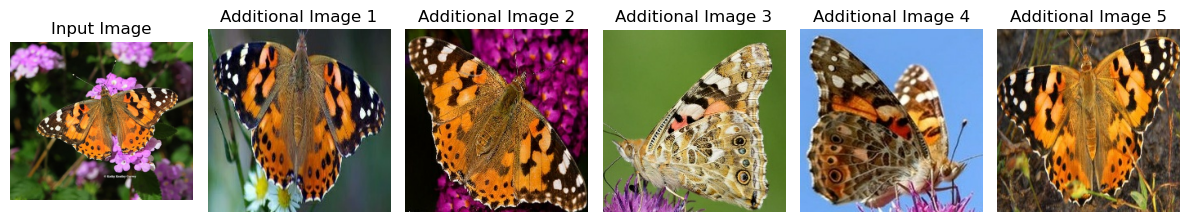


Predicted Class: PAINTED LADY
Confidence Score: 45.15%


In [34]:
# Take input URL from the user
image_url = input("Enter the URL of the image you want to classify: ")

image_data = load_image_from_url(image_url)


if image_data is not None:
    input_image = preprocess_image(image_data)
    predictions = model.predict(input_image)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_names[predicted_class_index]
    confidence_score = predictions[0][predicted_class_index] * 100  # Convert confidence score to percentage

    species_images = []
    for images, labels in val_dataset:
        for img, label in zip(images, labels):
            if label == predicted_class_index:
                species_images.append(img)
        # No need to break here, we want to fetch all images
    if len(species_images) == 0:
        print("No images of the predicted class found in the validation dataset.")
    else:
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 6, 1)
        plt.imshow(Image.open(BytesIO(image_data)))
        plt.title("Input Image")
        plt.axis('off')

        for i, img in enumerate(species_images[:5]):  # Limit to 5 additional images
            plt.subplot(1, 6, i+2)
            plt.imshow(img.numpy().astype("uint8"))
            plt.title("Additional Image {}".format(i+1))
            plt.axis('off')

        plt.tight_layout()  # Adjust layout to prevent overlapping
        plt.show()

        # Print predicted class and confidence score below the plot
        print("\nPredicted Class:", predicted_class)
        print("Confidence Score: {:.2f}%".format(confidence_score))
